[[ 0.28669901  0.95789543  0.00629311  0.01176483 -0.00787451]
 [ 0.95714721 -0.28693517  0.02125897  0.03181633  0.0085558 ]
 [-0.03259894 -0.00224888 -0.05197465  0.99805472 -0.01084765]
 [ 0.01589801  0.00578074 -0.8162593  -0.03571115  0.57633264]
 [-0.01890645  0.00812902  0.57491552  0.03822052  0.81706047]]


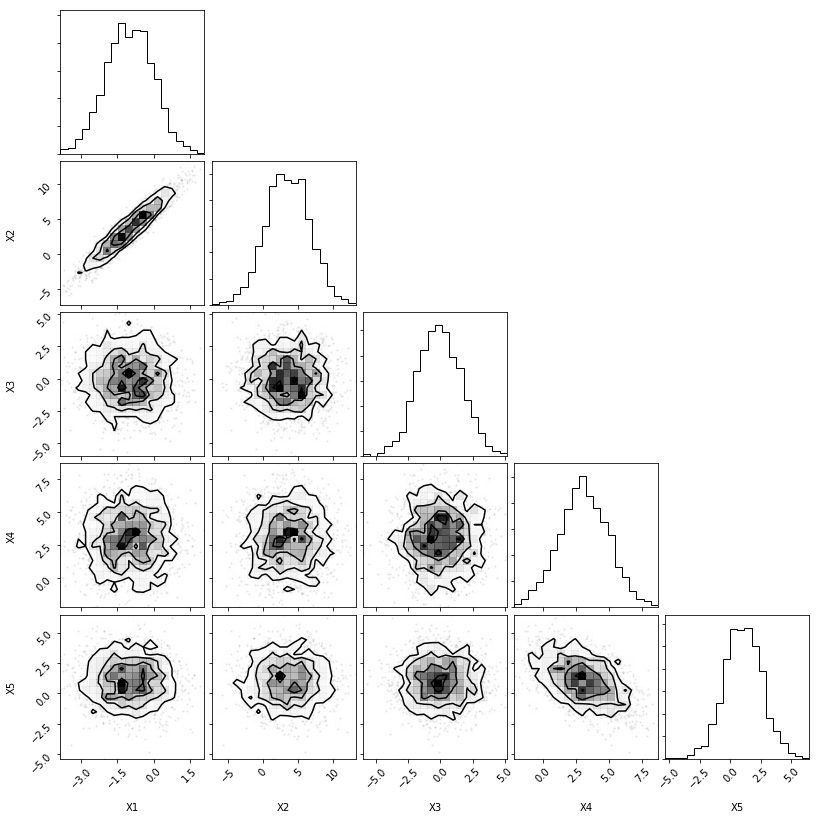

In [15]:
# homework # 01

## Here we are going to get a little experience with the covariance matrix 
## of data and principle components analysis (PCA).  This was introduced in the 
## lectures.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 1) Read file homework_01_2d-datafile.csv into a dataframe using pandas
df = pd.read_csv('homework_01_2d-datafile.csv', index_col=0)

plt.figure(figsize=(10,10))

# make a scatter plot of them
plt.plot(df['X'], df['Y'], marker='.', linestyle='none', color='red', label='real data')
plt.xlabel('x')
plt.ylabel('y')

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 2) Find the covariance matrix for the two variables.  There is a python function 
#    for this, but it would be more instructive if you write your own.
def covariance (x, y):
    if len(x) != len(y):
        raise ValueError("Variables' numbers must be the same")
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    appo = (x - mean_x)*(y - mean_y)
    cov = np.sum(appo)/n
    return cov

x = np.array(df['X'])
y = np.array(df['Y'])
cov_matrix = np.matrix([np.zeros(2), np.zeros(2)])
cov_matrix [0, 0] = covariance (x, x)
cov_matrix [0, 1] = covariance (x, y)
cov_matrix [1, 0] = covariance (y, x)
cov_matrix [1, 1] = covariance (y, y)

# Are they correlated? (Remember to normalize the correlation coefficient.)
# Yes, they are correlated.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 3) Decompose the covariance matrix using an eigenvalue decompositions (There are 
#    python functions for this.)
eigval, eigvect = np.linalg.eig(cov_matrix)

# What are the principle components of the data? Normalize the vectors to one.
eigvect1 = [eigvect[0,0], eigvect[1,0]]    # These eigenvectors are already normalized
eigvect2 = [eigvect[0,1], eigvect[1,1]]
plt.plot([0, eigvect1[0]], [0, eigvect1[1]], color='blue', label='cov. eigenvectors')
plt.plot([0, eigvect2[0]], [0, eigvect2[1]], color='blue')

# What are the variances of each principle component?
phi = -np.pi/2+np.arcsin(eigvect1[1]/eigvect1[0])
rot_matrix = np.matrix([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])
x_rot, y_rot = rot_matrix.dot([x, y])
plt.plot(x_rot[0,0], y_rot[0,0], marker='.', linestyle='none', color='yellow', label='rotated data')
plt.plot(x_rot, y_rot, marker='.', linestyle='none', color='yellow')
var_x_rot = np.var(x_rot)
var_y_rot = np.var(y_rot)

plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

print('The variance of the first principle component is: ' + str(var_x_rot))
print('The variance of the second principle component is: ' + str(var_y_rot))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 4) Do 1 through 3, but using the data file homework_01_5d-datafile.csv this time.
#    In this case the data is 5 dimensional.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 41) Read file homework_01_5d-datafile.csv into a dataframe using pandas
df_5 = pd.read_csv('homework_01_5d-datafile.csv', index_col=0)

# make a scatter (corner) plot of them
import corner
figure = corner.corner(df_5, labels=list(df_5))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 42) Find the covariance matrix for the five variables. There is a python function 
#    for this, but it would be more instructive if you write your own.
cov_matrix_5 = np.matrix([np.zeros(5), np.zeros(5), np.zeros(5), np.zeros(5), np.zeros(5)])
for i in range(5):
    for j in range(5):
        cov_matrix_5 [i,j] = covariance(df_5.iloc[:,i], df_5.iloc[:,j])

# Which variables seem to be correlated with each other and which ones not?
# Variables X1 and X2 seem to have a quite strong correlation, and maybe X4 and X5 too

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 43) Decompose the covariance matrix using an eigenvalue decompositions (There are 
#    python functions for this.)
eigval_5, eigvect_5 = np.linalg.eig(cov_matrix_5)

# I won't analyze these data as before, because they are too many